#### Problem Statement :-
    Implement K-Means clustering/ hierarchical clustering on sales_data_sample.csv dataset. Determine the number of clusters using the elbow method.
Dataset link : https://www.kaggle.com/datasets/kyanyoga/sample-sales-data

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("sales_data_sample.csv",encoding='latin1')

In [4]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [5]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [7]:
X = df.iloc[:, [1, 3]].values
X

array([[30,  2],
       [34,  5],
       [41,  2],
       ...,
       [43,  4],
       [34,  1],
       [47,  9]], dtype=int64)

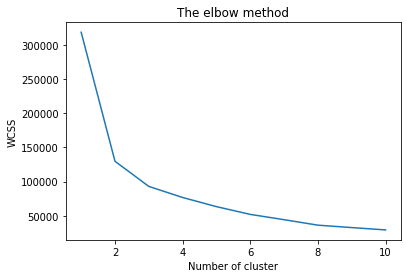

In [9]:
WCSS = [] # Within-Cluster Sum of Square

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

plt.plot(range(1,11), WCSS)
plt.title("The elbow method")
plt.xlabel("Number of cluster")
plt.ylabel('WCSS') 
plt.show()  

In [10]:
#The point at which the elbow shape is created is 3, that is, our K value or an optimal number of clusters is 3.
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [11]:
y_kmeans

array([2, 2, 1, ..., 1, 2, 1])

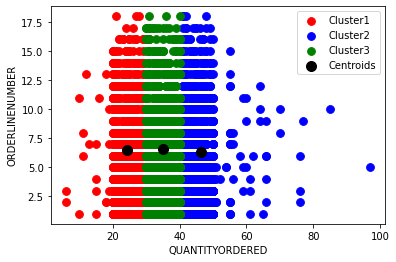

In [12]:
#Visualising the cluster
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s=60, c = 'red', label='Cluster1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s=60, c='blue', label='Cluster2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s=60, c='green', label='Cluster3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c = 'black', label ='Centroids')

plt.xlabel('QUANTITYORDERED') 
plt.ylabel('ORDERLINENUMBER') 
plt.legend()
plt.show()
